In [188]:
import sys
sys.path.append(f'../../FinanceHub')

from calendars import DayCounts
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
# Dados retirados da anbima no dia 26/04/2021
days = [
    126,252,378,504,630,756,882,1008,1134,1260,1386,1512,1638,1764,1890,
    2016,2142,2268,2394,
]

zero_curve = [
    3.8945,4.3199,4.5436,4.6496,4.6985,4.7255,4.7481,4.7738,4.8045,
    4.8399,4.8788,4.9197,4.9614,5.003,5.0434,5.0822,5.119,5.1535,5.1856,
]

ettj_pre = [
    4.2401,5.2888,6.1271,6.7623,7.241,7.6081,7.8972,8.1317,8.3271,8.4937,
    8.6384,8.7659,8.8795,8.9816,9.0739,9.1578,9.2344, 9.3045,9.3689,
]

In [190]:
# Dados do relatorio Focus de 23/04/2021
today = pd.to_datetime('2021-04-26')

end_dates = [
    '31/12/2021', '31/12/2022', '31/12/2023', '31/12/2024'
]
dc = DayCounts('BUS/252', calendar='anbima')
focus_days = [dc.days(today, pd.to_datetime(T)) for T in end_dates]
# Adicionando o primeiro dia dos dados da anbima
focus_days.insert(0, days[0])

# Adicionando o target de 4 semanas como primeiro ponto
focus_selic = [
    5.0, 5.50, 6.13, 6.50, 6.50
]
focus_ipca = [
    4.81,  5.04, 3.61, 3.25, 3.25
]

selic_pd = pd.DataFrame({'Yield': focus_selic, 'days': focus_days})
ipca_pd = pd.DataFrame({'Yield': focus_ipca, 'days': focus_days})

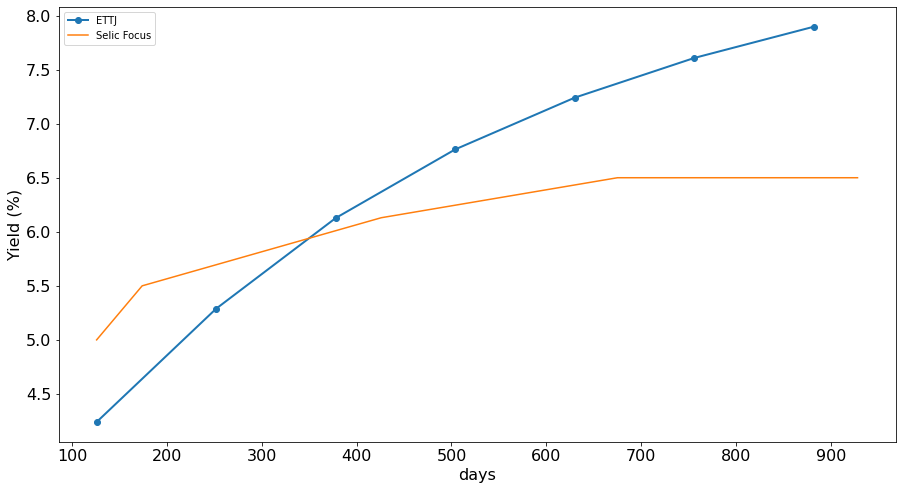

In [191]:
ettj_pd = pd.DataFrame({'Yield': ettj_pre, 'days': days})
ettj_plt = ettj_pd.iloc[0:7].reset_index().plot(x='days', y='Yield', fontsize=16, lw=2, marker='o', figsize=(15,8), grid=True, label='ETTJ')
ettj_plt.set_xlabel('Days', fontsize=16)
ettj_plt.set_ylabel('Yield (%)', fontsize=16)
selic_plt = selic_pd.plot(x="days", y="Yield", ax=ettj_plt, label='Selic Focus')
plt.show()

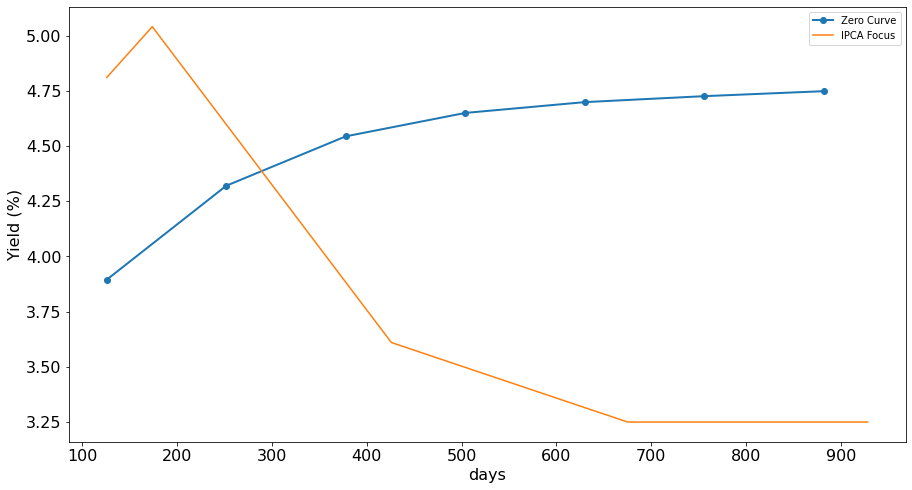

In [192]:
zero_pd = pd.DataFrame({'Yield': zero_curve, 'days': days})
zero_plt = zero_pd.iloc[0:7].reset_index().plot(x='days', y='Yield', fontsize=16, lw=2, marker='o', figsize=(15,8), grid=True, label='Zero Curve')
zero_plt.set_xlabel('Days', fontsize=16)
zero_plt.set_ylabel('Yield (%)', fontsize=16)
ipca_plt = ipca_pd.plot(x="days", y="Yield", ax=zero_plt, label='IPCA Focus')
plt.show()

In [193]:
# Scenario: Selic increase to 6.50, IPCA down to 3.25
# Choices:
# Pre: rate 8.38%, expiry: 01/01/2026
# Selic: rate Selic + 0,3477%, expiry 01/03/2027
# IPCA: IPCA + 3,40%

def calc_pu(_y, _du):
    return 10000.0/(1+_y)**(_du/252)

pre_pu = calc_pu(0.0838, dc.days(today, pd.to_datetime('2024-12-31')))
rend = (10000.0/pre_pu - 1) * 100 #%
print(rend)

end_of_year = dc.days(today, pd.to_datetime('2021-12-31'))
# Selic:
# Adjusting business days from
focus_selic[0] = focus_selic[0]**(end_of_year/252)
selic_rates = [x/100 + 0.3477/100 for x in focus_selic]
selic_rate = sum(selic_rates)*100
print(selic_rate)
# IPCA:
focus_ipca[0] = focus_ipca[0]**(end_of_year/252)
ipca_rates = [x/100 + 3.38/100 for x in focus_ipca]
ipca_rate = sum(ipca_rates)*100
print(ipca_rate)

34.49360030148612
29.406740480620684
35.00804607045453
